#Connecting libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import MaxPool2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Dense, Flatten 
from keras.models import Sequential
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator

In [3]:
!pip install catboost -q

import catboost as cb

     |████████████████████████████████| 76.6 MB 89 kB/s 


#Loading data

(1855, 64, 64, 1)
(1855, 10)
(207, 64, 64, 1)

(1855, 4096)
(1855,)
(207, 4096)


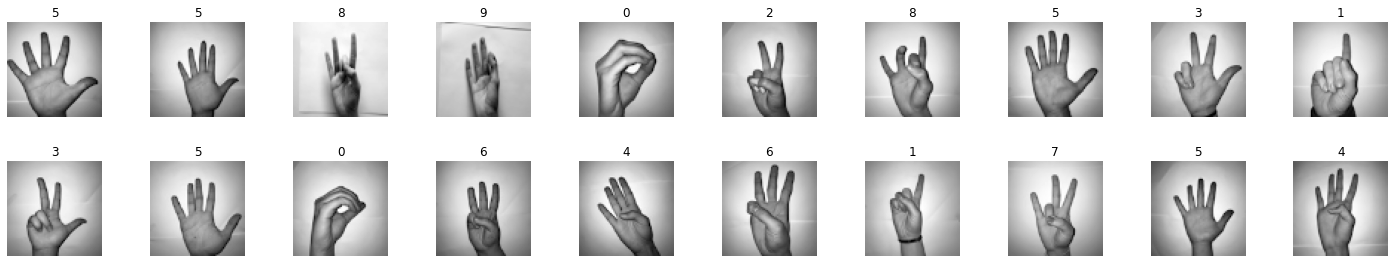

In [4]:
original_x_train = np.load('XTrain_new.npy')
original_y_train = np.load('YTrain_new.npy')
original_x_test = np.load('XTest_new.npy')

print(original_x_train.shape)
print(original_y_train.shape)
print(original_x_test.shape)

nsamples, nx, ny, _ = original_x_train.shape
original_x_train_2d = original_x_train.reshape((nsamples, nx * ny))
original_x_train_2d = preprocessing.normalize(original_x_train_2d)

original_y_train_classes = np.argmax(original_y_train, axis = -1)

nsamples, nx, ny, _ = original_x_test.shape
original_x_test_2d = original_x_test.reshape((nsamples, nx * ny))
original_x_test_2d = preprocessing.normalize(original_x_test_2d)

print()
print(original_x_train_2d.shape)
print(original_y_train_classes.shape)
print(original_x_test_2d.shape)

plt.subplots(2, 10, figsize = (20, 4))
plt.tight_layout()
for i in range(0, 20):
    #n = np.random.randint(0, original_x_train_2d.shape[0])
    plt.subplot(2, 10, i + 1)
    plt.axis('off')        
    plt.gca().set_title(original_y_train_classes[i])
    plt.imshow(original_x_train_2d[i].reshape(64, 64), cmap = 'gray')       
plt.show()  

#Dataset info

In [5]:
train = pd.DataFrame(original_x_train_2d)
train['class'] = original_y_train_classes
train

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,class
0,0.013179,0.013535,0.013904,0.014198,0.014501,0.014758,0.015038,0.015318,0.015598,0.015878,...,0.010901,0.010621,0.010380,0.010100,0.009927,0.009786,0.009568,0.009314,0.009034,5
1,0.011983,0.012212,0.012476,0.012746,0.013187,0.013676,0.013907,0.014112,0.014357,0.014639,...,0.010577,0.010343,0.010104,0.009962,0.009686,0.009426,0.009093,0.008817,0.008730,5
2,0.016847,0.017051,0.017148,0.017165,0.017269,0.017566,0.017720,0.017753,0.017753,0.017885,...,0.014964,0.014964,0.014955,0.014848,0.014727,0.014685,0.014640,0.014468,0.014248,8
3,0.017133,0.016906,0.016846,0.015714,0.015929,0.015506,0.013838,0.012919,0.012630,0.012678,...,0.015022,0.014942,0.014919,0.014826,0.014816,0.014785,0.014713,0.014639,0.014639,9
4,0.011063,0.011393,0.011692,0.012050,0.012452,0.012854,0.013233,0.013477,0.013724,0.013929,...,0.010799,0.010552,0.010390,0.010179,0.009991,0.009839,0.009645,0.009400,0.009210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,0.011401,0.011719,0.011986,0.012292,0.012666,0.012973,0.013255,0.013641,0.013904,0.014113,...,0.011583,0.011371,0.011185,0.010962,0.010813,0.010670,0.010466,0.010335,0.010249,7
1851,0.012304,0.012652,0.012990,0.013405,0.013740,0.014046,0.014351,0.014601,0.014885,0.015169,...,0.012009,0.011780,0.011517,0.011276,0.011023,0.010869,0.010690,0.010467,0.010314,5
1852,0.012871,0.013149,0.013313,0.013488,0.013721,0.013858,0.014013,0.014153,0.014302,0.014409,...,0.012280,0.011928,0.011711,0.011413,0.011070,0.010275,0.009465,0.009004,0.009948,5
1853,0.011003,0.011235,0.011503,0.011766,0.011921,0.012161,0.012358,0.012617,0.012825,0.012993,...,0.013938,0.013710,0.013307,0.012970,0.012692,0.012480,0.012279,0.012089,0.011967,6


In [6]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,class
count,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,...,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000
mean,0.012217,0.012453,0.012702,0.012951,0.013199,0.013446,0.013676,0.013900,0.014137,0.014374,...,0.011890,0.011719,0.011544,0.011355,0.011149,0.010953,0.010760,0.010569,0.010407,4.490027
std,0.001757,0.001725,0.001689,0.001652,0.001626,0.001593,0.001558,0.001525,0.001491,0.001455,...,0.001617,0.001555,0.001552,0.001566,0.001615,0.001646,0.001667,0.001691,0.001708,2.864954
min,0.007188,0.007693,0.007789,0.009063,0.009352,0.009577,0.009763,0.009786,0.009717,0.009570,...,0.001533,0.003179,0.004733,0.005433,0.001594,0.001296,0.001362,0.001314,0.001293,0.000000
25%,0.011284,0.011529,0.011777,0.012050,0.012303,0.012571,0.012803,0.013030,0.013295,0.013564,...,0.010927,0.010706,0.010503,0.010298,0.010093,0.009891,0.009690,0.009501,0.009355,2.000000
50%,0.011910,0.012167,0.012428,0.012711,0.012995,0.013264,0.013523,0.013780,0.014028,0.014289,...,0.011661,0.011456,0.011243,0.011037,0.010819,0.010610,0.010402,0.010177,0.010025,4.000000
75%,0.012566,0.012824,0.013114,0.013401,0.013679,0.013934,0.014178,0.014446,0.014700,0.014948,...,0.012628,0.012415,0.012184,0.011945,0.011709,0.011468,0.011259,0.011037,0.010844,7.000000
max,0.019265,0.019265,0.019238,0.019169,0.019167,0.019139,0.019174,0.019369,0.019473,0.019690,...,0.018717,0.020411,0.021852,0.022897,0.023785,0.024560,0.025460,0.025985,0.026126,9.000000


In [7]:
print('Classes:')
classes = train['class'].unique()
print(np.sort(classes))

Classes:
[0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


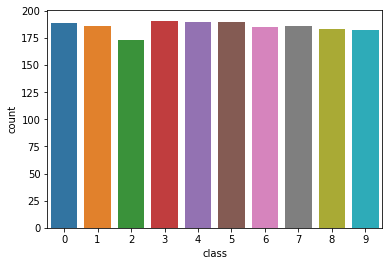

In [8]:
seaborn.countplot(train['class'], label = 'Count')

#Creating training and testing sets

In [9]:
x_train, x_test, y_train, y_test = train_test_split(original_x_train_2d, original_y_train_classes, test_size = 0.2, random_state = 42, shuffle = True)
x_train_, x_validation, y_train_, y_validation = train_test_split(x_train, y_train, test_size = 0.05, random_state = 42)

y_train_categorical = to_categorical(y_train_)
y_test_categorical  = to_categorical(y_test)
y_validation_categorical  = to_categorical(y_validation)

#K-nearest neighbors

In [10]:
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(f'Accuracy score: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(y_test, y_pred))

Accuracy score: 65.50

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        37
           1       0.58      0.91      0.71        35
           2       0.73      0.56      0.64        39
           3       0.79      0.73      0.76        37
           4       0.41      0.37      0.39        46
           5       0.86      0.68      0.76        37
           6       0.44      0.54      0.48        41
           7       0.44      0.52      0.47        27
           8       0.82      0.57      0.68        40
           9       0.79      0.94      0.86        32

    accuracy                           0.65       371
   macro avg       0.68      0.67      0.66       371
weighted avg       0.68      0.65      0.66       371



#Logistic regression

In [11]:
from sklearn import metrics

logit = LogisticRegression()
logit.fit(x_train, y_train)
y_pred = logit.predict(x_test)

print(f'Accuracy score: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(y_test, y_pred))

Accuracy score: 59.57

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.84      0.74        37
           1       0.59      0.86      0.70        35
           2       0.86      0.31      0.45        39
           3       0.64      0.73      0.68        37
           4       0.33      0.02      0.04        46
           5       0.72      0.78      0.75        37
           6       0.65      0.49      0.56        41
           7       0.34      0.78      0.48        27
           8       0.74      0.50      0.60        40
           9       0.55      0.94      0.69        32

    accuracy                           0.60       371
   macro avg       0.61      0.62      0.57       371
weighted avg       0.61      0.60      0.56       371



#Decision tree

In [ ]:
from sklearn import metrics

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

print(f'Accuracy score: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(y_test, y_pred))

Accuracy score: 56.33

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.69        37
           1       0.62      0.74      0.68        35
           2       0.57      0.54      0.55        39
           3       0.54      0.54      0.54        37
           4       0.35      0.35      0.35        46
           5       0.72      0.76      0.74        37
           6       0.47      0.34      0.39        41
           7       0.56      0.81      0.67        27
           8       0.54      0.53      0.53        40
           9       0.54      0.59      0.57        32

    accuracy                           0.56       371
   macro avg       0.57      0.58      0.57       371
weighted avg       0.57      0.56      0.56       371



#Random forest

In [13]:
from sklearn import metrics

forest = RandomForestClassifier(n_estimators = 100, bootstrap = True, random_state = 42, n_jobs = -1)
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)

print(f'Accuracy score: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(y_test, y_pred, digits = 4))

Accuracy score: 77.36

Classification report:
              precision    recall  f1-score   support

           0     0.8333    0.8108    0.8219        37
           1     0.8824    0.8571    0.8696        35
           2     0.8571    0.7692    0.8108        39
           3     0.8788    0.7838    0.8286        37
           4     0.6571    0.5000    0.5679        46
           5     0.8684    0.8919    0.8800        37
           6     0.6905    0.7073    0.6988        41
           7     0.5854    0.8889    0.7059        27
           8     0.8056    0.7250    0.7632        40
           9     0.7317    0.9375    0.8219        32

    accuracy                         0.7736       371
   macro avg     0.7790    0.7872    0.7769       371
weighted avg     0.7811    0.7736    0.7718       371



###Hyperparameters search

In [14]:
from sklearn import metrics

parameters = {'n_estimators': [50, 100], 'max_depth': [4, 8], 'criterion': ['gini', 'entropy', 'log_loss']}

gs_forest = GridSearchCV(estimator = forest, param_grid = parameters, n_jobs = -1, verbose = 4)     
gs_forest.fit(x_train, y_train)

print()
print(f'Best parameters: {gs_forest.best_params_}')
forest.set_params(**gs_forest.best_params_)

y_pred = forest.predict(x_test)

print()
print(f'Accuracy score: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(y_test, y_pred, digits = 4))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 935, in


Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100}

Accuracy score: 77.36

Classification report:
              precision    recall  f1-score   support

           0     0.8333    0.8108    0.8219        37
           1     0.8824    0.8571    0.8696        35
           2     0.8571    0.7692    0.8108        39
           3     0.8788    0.7838    0.8286        37
           4     0.6571    0.5000    0.5679        46
           5     0.8684    0.8919    0.8800        37
           6     0.6905    0.7073    0.6988        41
           7     0.5854    0.8889    0.7059        27
           8     0.8056    0.7250    0.7632        40
           9     0.7317    0.9375    0.8219        32

    accuracy                         0.7736       371
   macro avg     0.7790    0.7872    0.7769       371
weighted avg     0.7811    0.7736    0.7718       371



#Gradient tree boosting

In [ ]:
from sklearn import metrics

parameters = {'depth': [2, 4], 'learning_rate': [0.01, 0.1], 'iterations': [50, 100]}
cat = cb.CatBoostClassifier(loss_function = 'MultiClass', eval_metric = 'Accuracy', random_seed = 42, od_type = 'Iter', od_wait = 10)
grid_search_result = cat.grid_search(parameters, cv = 3, X = x_train, y = y_train)
cat.get_all_params()

y_pred = cat.predict(x_test)

print()
print(f'Accuracy score: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}')
print()
print('Classification report:')
print(classification_report(y_test, y_pred, digits = 4))

0:	learn: 0.2342039	test: 0.1750842	best: 0.1750842 (0)	total: 1.38s	remaining: 1m 7s
1:	learn: 0.2443134	test: 0.2188552	best: 0.2188552 (1)	total: 1.87s	remaining: 44.8s
2:	learn: 0.2544229	test: 0.2255892	best: 0.2255892 (2)	total: 2.38s	remaining: 37.3s
3:	learn: 0.2780118	test: 0.2525253	best: 0.2525253 (3)	total: 2.88s	remaining: 33.1s
4:	learn: 0.2780118	test: 0.2457912	best: 0.2525253 (3)	total: 3.4s	remaining: 30.6s
5:	learn: 0.2805392	test: 0.2491582	best: 0.2525253 (3)	total: 3.93s	remaining: 28.8s
6:	learn: 0.2822241	test: 0.2592593	best: 0.2592593 (6)	total: 4.46s	remaining: 27.4s
7:	learn: 0.2889638	test: 0.2592593	best: 0.2592593 (6)	total: 4.95s	remaining: 26s
8:	learn: 0.2898062	test: 0.2626263	best: 0.2626263 (8)	total: 5.49s	remaining: 25s
9:	learn: 0.2906487	test: 0.2558923	best: 0.2626263 (8)	total: 5.99s	remaining: 24s
10:	learn: 0.2830666	test: 0.2693603	best: 0.2693603 (10)	total: 6.5s	remaining: 23.1s
11:	learn: 0.2822241	test: 0.2760943	best: 0.2760943 (11)	to

#MLP (Keras)

In [34]:
perceptron = Sequential()
perceptron.add(Dense(1024, input_dim = x_train_.shape[1], activation = 'relu'))
perceptron.add(Dense(512, activation = 'relu'))
perceptron.add(Dense(128, activation = 'relu'))
perceptron.add(Dense(32, activation = 'relu'))
perceptron.add(Dense(y_train_categorical.shape[1], activation = 'sigmoid'))

perceptron.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
perceptron.summary()

perceptron.fit(x_train_, y_train_categorical, validation_data = (x_validation, y_validation_categorical), epochs = 500, batch_size = x_train_.shape[0])

_, accuracy = perceptron.evaluate(x_test, y_test_categorical)  

print()
print(f'Accuracy: {accuracy * 100:.2f}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1024)              4195328   
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 4,790,250
Trainable params: 4,790,250
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [===========================

#Sets for convolutional neural networs (CNN)

In [17]:
x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn = train_test_split(original_x_train, original_y_train, test_size = 0.2, random_state = 42, shuffle = True)
x_train_cnn1, x_validation_cnn, y_train_cnn1, y_validation_cnn = train_test_split(x_train_cnn, y_train_cnn, test_size = 0.05, random_state = 42)    

#Augmentation

Train dataset


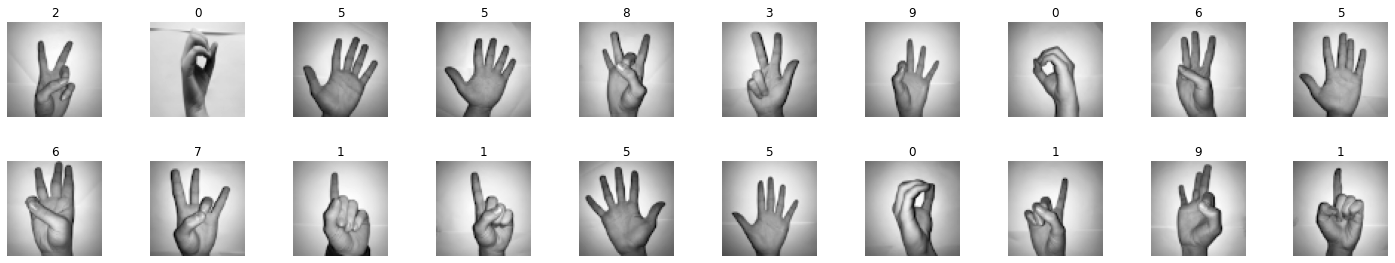

Validation dataset


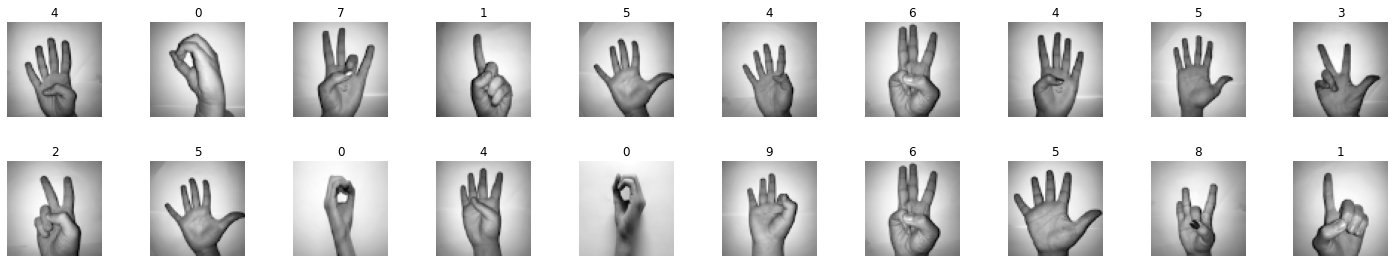

In [18]:
im_gen = ImageDataGenerator(horizontal_flip = True)
im_gen.fit(original_x_train, seed = 42)

im_gen_validation = ImageDataGenerator(horizontal_flip = True)
im_gen_validation.fit(x_validation_cnn, seed = 42)

print('Train dataset')
plt.subplots(2, 10, figsize = (20, 4))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')     
    temp = im_gen.flow(x_train_cnn1, y_train_cnn1, batch_size = 1).next()
    plt.gca().set_title(np.argmax(temp[1]))
    plt.imshow(temp[0].reshape(64, 64), cmap = 'gray')    
plt.show()

print('Validation dataset')
plt.subplots(2, 10, figsize = (20, 4))
plt.tight_layout()
for i in range(0, 20):
    plt.subplot(2, 10, i + 1)
    plt.axis('off')     
    temp = im_gen_validation.flow(x_validation_cnn, y_validation_cnn, batch_size = 1).next()
    plt.gca().set_title(np.argmax(temp[1]))
    plt.imshow(temp[0].reshape(64, 64), cmap = 'gray')    
plt.show()

#CNN №1 (Keras)

In [32]:
model_cnn = Sequential()
model_cnn.add(Conv2D(8, (3, 3), activation='relu', input_shape = (64, 64, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(16, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(units = 10, activation = 'sigmoid'))

model_cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_cnn.build(input_shape = (64, 64, 1))

model_cnn.summary()

model_cnn.fit(im_gen.flow(x_train_cnn1, y_train_cnn1, batch_size = 32), validation_data = im_gen_validation.flow(x_validation_cnn, y_validation_cnn, batch_size = 32), epochs = 50)

_, accuracy = model_cnn.evaluate(x_test_cnn, y_test_cnn)  

print()
print(f'Accuracy: {accuracy * 100:.2f}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)        

#CNN №2 (Keras)

In [ ]:
model_cnn2 = Sequential()
model_cnn2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (64, 64, 1)))
model_cnn2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (64, 64, 1)))
model_cnn2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (64, 64, 1)))
model_cnn2.add(MaxPool2D(pool_size = (2, 2)))
model_cnn2.add(Dropout(0.1))
model_cnn2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation ='relu'))  
model_cnn2.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))                  
model_cnn2.add(Conv2D(filters = 64, kernel_size = (3, 3), activation ='relu'))                 
model_cnn2.add(BatchNormalization())
model_cnn2.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model_cnn2.add(Dropout(0.1))  
model_cnn2.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model_cnn2.add(BatchNormalization())
model_cnn2.add(Flatten())
model_cnn2.add(Dense(320, activation = 'relu'))
model_cnn2.add(Dropout(0.2))
model_cnn2.add(Dense(10, activation = 'sigmoid'))

model_cnn2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_cnn2.build(input_shape = (64, 64, 1))

model_cnn2.summary()

model_cnn2.fit(im_gen.flow(x_train_cnn1, y_train_cnn1, batch_size = 32), validation_data = im_gen_validation.flow(x_validation_cnn, y_validation_cnn, batch_size = 32), epochs = 20)

_, accuracy = model_cnn.evaluate(x_test_cnn, y_test_cnn)  

print()
print(f'Accuracy: {accuracy * 100:.2f}')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 conv2d_24 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 64)        18496     
                                                     

#MLP (PyTorch)

In [20]:
import torch           
from torch import nn           
import torch.nn.functional as F
from torchsummary import summary 
from tqdm.notebook import tqdm 

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
torch_x_train = torch.tensor(x_train_, dtype = torch.float32).to(device)
torch_x_test = torch.tensor(x_test, dtype = torch.float32).to(device)
torch_x_validation = torch.tensor(x_validation, dtype = torch.float32).to(device)

torch_y_train = torch.tensor(y_train_, dtype = torch.int64).to(device)
torch_y_test = torch.tensor(y_test, dtype = torch.int64).to(device)
torch_y_validation = torch.tensor(y_validation, dtype = torch.int64).to(device)

In [ ]:
perceptron_torch = nn.Sequential(
  nn.Linear(x_train.shape[1], 500),
  nn.ReLU(),
  nn.Linear(500, 200),
  nn.ReLU(),
  nn.Linear(200, 100),
  nn.ReLU(),
  nn.Linear(100, 50),
  nn.ReLU(),
  nn.Linear(50, y_train_categorical.shape[1])
).to(device)

perceptron_torch

Sequential(
  (0): Linear(in_features=4096, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=50, bias=True)
  (7): ReLU()
  (8): Linear(in_features=50, out_features=10, bias=True)
)

In [22]:
def calc_accuracy(model, x_train, y_train, x_test, y_test):
  model.eval()
  y_pred = model(x_train)
  y_pred = nn.functional.softmax(y_pred, dim = 1)
  y_pred = np.argmax(y_pred.detach().cpu().numpy(), axis = 1 )
  accuracy = (y_pred == y_train.cpu().numpy()).sum() / y_pred.shape[0]
  y_pred = model(x_test)  
  y_pred = nn.functional.softmax(y_pred, dim = 1)
  y_pred = np.argmax(y_pred.detach().cpu().numpy(), axis = 1)
  validation_accuracy = (y_pred == y_test.cpu().numpy()).sum() / y_pred.shape[0]

  return accuracy, validation_accuracy

  0%|          | 0/500 [00:00<?, ?it/s]

  0 loss    2.310071e+00 || train accuracy: 0.09794 - val accuracy: 0.08000
 25 loss    2.290833e+00 || train accuracy: 0.10717 - val accuracy: 0.04000
 50 loss    1.962007e+00 || train accuracy: 0.29595 - val accuracy: 0.25333
 75 loss    1.528848e+00 || train accuracy: 0.42370 - val accuracy: 0.38667
100 loss    1.396024e+00 || train accuracy: 0.45138 - val accuracy: 0.41333
125 loss    1.295485e+00 || train accuracy: 0.48758 - val accuracy: 0.42667
150 loss    1.237036e+00 || train accuracy: 0.50887 - val accuracy: 0.44000
175 loss    1.166962e+00 || train accuracy: 0.54578 - val accuracy: 0.49333
200 loss    1.109087e+00 || train accuracy: 0.56494 - val accuracy: 0.52000
225 loss    1.061879e+00 || train accuracy: 0.58694 - val accuracy: 0.48000
250 loss    1.026213e+00 || train accuracy: 0.60185 - val accuracy: 0.53333
275 loss    9.989656e-01 || train accuracy: 0.60894 - val accuracy: 0.54667
300 loss    9.723383e-01 || train accuracy: 0.61888 - val accuracy: 0.52000
325 loss    

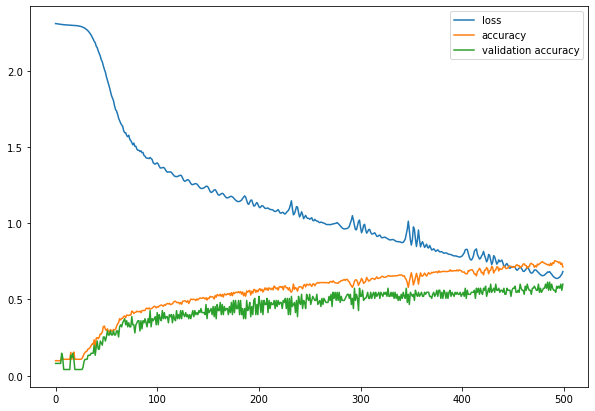

In [ ]:
optimizer = torch.optim.Adam(perceptron_torch.parameters(), lr = 0.001)
loss_function = nn.CrossEntropyLoss()

losses = []
accuracies = []
validation_accuraries = []
epochs = 500

for i in tqdm(range(epochs)):
  perceptron_torch.train()
  y_pred = perceptron_torch(torch_x_train)
  optimizer.zero_grad()
  loss = loss_function(y_pred, torch_y_train)
  loss.backward()
  losses.append(loss.item())
  accurary, validation_accurary = calc_accuracy(perceptron_torch, torch_x_train, torch_y_train, torch_x_validation, torch_y_validation)
  accuracies.append(accurary)
  validation_accuraries.append(validation_accurary)
  optimizer.step()
  if i % (epochs // 20) == 0:
    print(f"{i:3d} loss {loss:15e}", end = " || ")
    print(f"train accuracy: {accurary:6.5f} - val accuracy: {validation_accurary:6.5f}")

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.plot(losses, label = 'loss')
ax.plot(accuracies, label = 'accuracy')
ax.plot(validation_accuraries, label = 'validation accuracy')
ax.legend()
plt.show()

In [ ]:
def evaluate(net, x_test, y_test):
  net.eval()
  y_pred = net(x_test)
  y_pred = nn.functional.softmax(y_pred, dim = 1)
  y_pred = np.argmax(y_pred.detach().cpu().numpy(), axis = 1)
  val_acc = (y_pred == y_test.cpu().numpy()).sum() / y_pred.shape[0]
  print(f"Accuracy: {val_acc:.4f}")
  print(classification_report(y_pred, y_test.cpu().numpy()))

evaluate(perceptron_torch, torch_x_test, torch_y_test)

Accuracy: 0.6307
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        33
           1       0.86      0.65      0.74        46
           2       0.67      0.68      0.68        38
           3       0.84      0.72      0.77        43
           4       0.28      0.46      0.35        28
           5       0.89      0.80      0.85        41
           6       0.46      0.40      0.43        48
           7       0.41      0.31      0.35        35
           8       0.38      0.52      0.43        29
           9       0.78      0.83      0.81        30

    accuracy                           0.63       371
   macro avg       0.64      0.63      0.63       371
weighted avg       0.66      0.63      0.64       371



#CNN (PyTorch)

In [19]:
!unzip my_dataset.zip
!ls -al

Archive:  my_dataset.zip
   creating: my_dataset/
   creating: my_dataset/test/
   creating: my_dataset/test/0/
  inflating: my_dataset/test/0/IMG_5476.JPG  
  inflating: my_dataset/test/0/IMG_5486.JPG  
  inflating: my_dataset/test/0/IMG_5497.JPG  
  inflating: my_dataset/test/0/IMG_5507.JPG  
  inflating: my_dataset/test/0/IMG_5517.JPG  
  inflating: my_dataset/test/0/IMG_5527.JPG  
  inflating: my_dataset/test/0/IMG_5537.JPG  
  inflating: my_dataset/test/0/IMG_5547.JPG  
  inflating: my_dataset/test/0/IMG_5562.JPG  
  inflating: my_dataset/test/0/IMG_5572.JPG  
  inflating: my_dataset/test/0/IMG_5582.JPG  
  inflating: my_dataset/test/0/IMG_5592.JPG  
  inflating: my_dataset/test/0/IMG_5603.JPG  
  inflating: my_dataset/test/0/IMG_5615.JPG  
  inflating: my_dataset/test/0/IMG_5625.JPG  
  inflating: my_dataset/test/0/IMG_5635.JPG  
  inflating: my_dataset/test/0/IMG_5645.JPG  
  inflating: my_dataset/test/0/IMG_5655.JPG  
  inflating: my_dataset/test/0/IMG_5665.JPG  
  inflating: m

In [28]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

def get_data(train_dir, test_dir):
  transform = transforms.Compose([
                                  transforms.RandomHorizontalFlip(), 
                                  transforms.ToTensor(), 
                                  #transforms.Grayscale(num_output_channels = 1)
                                  ])

  train_set = datasets.ImageFolder(train_dir, transform = transform)
  test_set = datasets.ImageFolder(test_dir, transform = transform)

  train = DataLoader(train_set, batch_size = 32, shuffle = True)
  test = DataLoader(test_set, batch_size = 32, shuffle = True)

  return train, test

In [29]:
def showcase_images(data_set):
  classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
  dataiter = iter(data_set)
  images, labels = dataiter.next()
  fig, axes = plt.subplots(figsize = (20, 8), ncols = 10)
  for i in range(10):
      ax = axes[i]
      ax.imshow(images[i].permute(1, 2, 0)) 
      ax.title.set_text(' '.join('%5s' % classes[labels[i]]))
  plt.show()
  
  #(B, C, H, W), B - a number of images in the, C - a number of channels, H and W are image height and width
  print('images shape on batch size = {}'.format(images.size()))
  print('labels shape on batch size = {}'.format(labels.size()))

In [30]:
train, test = get_data('my_dataset/train', 'my_dataset/test')

Train


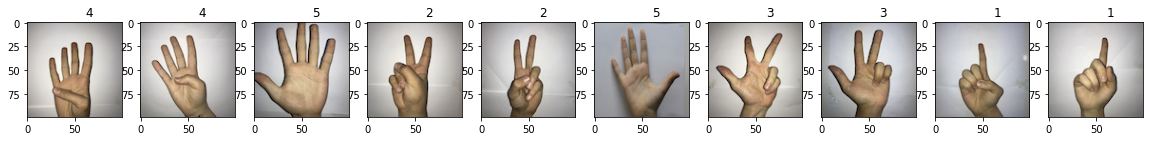

images shape on batch size = torch.Size([32, 3, 100, 100])
labels shape on batch size = torch.Size([32])
Test


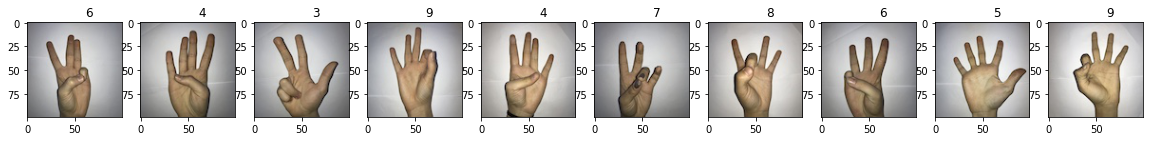

images shape on batch size = torch.Size([32, 3, 100, 100])
labels shape on batch size = torch.Size([32])


In [31]:
print('Train')
showcase_images(train)
print('Test')
showcase_images(test)

In [ ]:
class MyCNN(nn.Module):
  def __init__(self):        
    super().__init__()
    self.network = nn.Sequential(
      nn.Conv2d(3, 8, kernel_size = (3, 3)), 
      nn.MaxPool2d(2, 2), #output: 8 x 32 x 32
      nn.ReLU(),
      nn.Conv2d(8, 16, kernel_size = (3, 3)), 
      nn.MaxPool2d(2, 2), #output: 16 x 16 x 16
      nn.ReLU(),
      nn.Conv2d(16, 32, kernel_size = (3, 3)), 
      nn.MaxPool2d(2, 2), #output: 32 x 8 x 8
      nn.ReLU(),
      nn.Conv2d(32, 64, kernel_size = (3, 3)), 
      nn.MaxPool2d(2, 2), #output: 64 x 4 x 4
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(64 * 4 * 4, 10))

  def forward(self, x):
    return self.network(x)

In [ ]:
cnn_pytorch = MyCNN()
cnn_pytorch.to(device)

cnn_pytorch

MyCNN(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU()
    (9): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=1024, out_features=10, bias=True)
  )
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Step [5/49], Loss: 2.2884, Accuracy: 12.50%
Epoch [1/10], Step [10/49], Loss: 2.3192, Accuracy: 3.12%
Epoch [1/10], Step [15/49], Loss: 2.3219, Accuracy: 6.25%
Epoch [1/10], Step [20/49], Loss: 2.3054, Accuracy: 3.12%
Epoch [1/10], Step [25/49], Loss: 2.3044, Accuracy: 9.38%
Epoch [1/10], Step [30/49], Loss: 2.3008, Accuracy: 12.50%
Epoch [1/10], Step [35/49], Loss: 2.3042, Accuracy: 6.25%
Epoch [1/10], Step [40/49], Loss: 2.3020, Accuracy: 9.38%
Epoch [1/10], Step [45/49], Loss: 2.3065, Accuracy: 0.00%
Epoch [2/10], Step [5/49], Loss: 2.3049, Accuracy: 3.12%
Epoch [2/10], Step [10/49], Loss: 2.2984, Accuracy: 15.62%
Epoch [2/10], Step [15/49], Loss: 2.3051, Accuracy: 9.38%
Epoch [2/10], Step [20/49], Loss: 2.3019, Accuracy: 9.38%
Epoch [2/10], Step [25/49], Loss: 2.2999, Accuracy: 6.25%
Epoch [2/10], Step [30/49], Loss: 2.3150, Accuracy: 0.00%
Epoch [2/10], Step [35/49], Loss: 2.2952, Accuracy: 12.50%
Epoch [2/10], Step [40/49], Loss: 2.3020, Accuracy: 6.25%
Epoch [2/10]

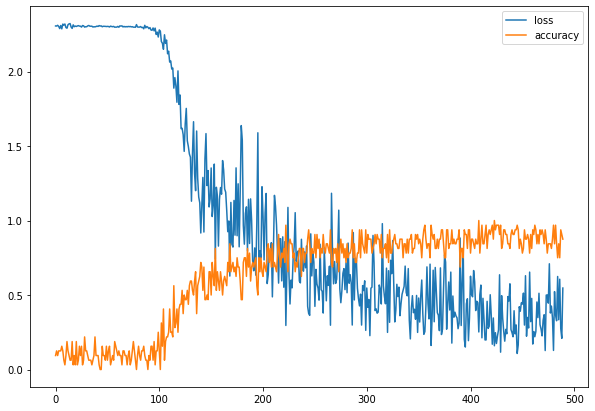

In [ ]:
optimizer = torch.optim.Adam(cnn_pytorch.parameters(), lr = 0.001)
loss_function = nn.CrossEntropyLoss()

total_step = len(train)
losses = []
accuracies = []
epochs = 10

for epoch in tqdm(range(epochs)):
  for i, (images, labels) in enumerate(train):
    cnn_pytorch.train()
    outputs = cnn_pytorch(images)
    optimizer.zero_grad()
    loss = loss_function(outputs, labels)
    loss.backward()
    losses.append(loss.item())
    total = labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    accuracies.append(correct / total)
    optimizer.step()
    if (i + 1) % 5 == 0:
      print(f'Epoch [{epoch + 1}/{epochs}], Step [{i + 1}/{total_step}], Loss: {loss.item():.4f}, Accuracy: {((correct / total) * 100):.2f}%')

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
ax.plot(losses, label = 'loss')
ax.plot(accuracies, label = 'accuracy')
ax.legend()
plt.show()

In [ ]:
cnn_pytorch.eval()
correct = 0
total = 0

for i, (images, labels) in enumerate(test):
  outputs = cnn_pytorch(images)
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()
  print(f'Test Accuracy of the model on the {len(images)} test images: {(correct / total) * 100}')

Test Accuracy of the model on the 32 test images: 84.375
Test Accuracy of the model on the 32 test images: 85.9375
Test Accuracy of the model on the 32 test images: 84.375
Test Accuracy of the model on the 32 test images: 85.15625
Test Accuracy of the model on the 32 test images: 86.25
Test Accuracy of the model on the 32 test images: 86.45833333333334
Test Accuracy of the model on the 32 test images: 87.05357142857143
Test Accuracy of the model on the 32 test images: 85.546875
Test Accuracy of the model on the 32 test images: 86.80555555555556
Test Accuracy of the model on the 32 test images: 86.25
Test Accuracy of the model on the 32 test images: 86.64772727272727
Test Accuracy of the model on the 32 test images: 86.97916666666666
Test Accuracy of the model on the 32 test images: 87.25961538461539
Test Accuracy of the model on the 32 test images: 87.5
Test Accuracy of the model on the 32 test images: 87.70833333333333
Test Accuracy of the model on the 30 test images: 88.2352941176470

#Output files with predictions

In [ ]:
prediction = perceptron_torch(torch.tensor(original_x_test_2d, dtype = torch.float32).to(device))
prediction = prediction.detach().cpu().numpy()

#prediction = model_cnn2.predict(original_x_test)
#prediction = model_cnn.predict(original_x_test)
#prediction = perceptron.predict(original_x_test_2d)

prediction = np.argmax(prediction, axis = 1)

submission = pd.DataFrame({'class': prediction})
submission.to_csv('my_submission.csv', index = True, index_label = 'id', header = 'number', float_format = '%d')

my_submission = pd.read_csv('my_submission.csv')
my_submission

,id,class
0,0,8
1,1,5
2,2,8
3,3,2
4,4,8
...,...,...
202,202,8
203,203,2
204,204,1
205,205,2


###Predictions test

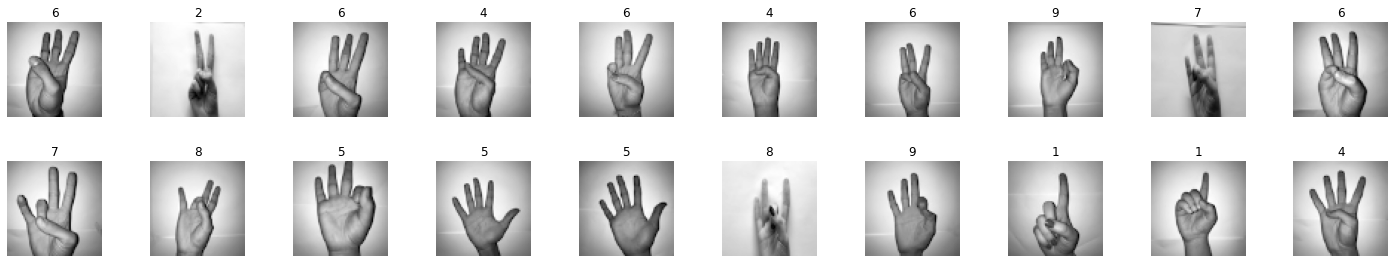

In [33]:
plt.subplots(2, 10, figsize = (20, 4))
plt.tight_layout()
for i in range(0, 20):
    n = np.random.randint(0, original_x_test.shape[0])
    image = np.reshape(original_x_test[n], (1, original_x_test.shape[1], original_x_test.shape[2]))
    prediction = np.argmax(model_cnn.predict(image), axis = 1)
    plt.subplot(2, 10, i + 1)
    plt.axis('off')        
    plt.gca().set_title(prediction[0])
    plt.imshow(image.reshape(64, 64), cmap = 'gray')       
plt.show()  

#Results

* Accuracy of K-nearest neighbors method is 65.50
* Accuracy of decision tree is 56.33
* Accuracy of logistic regression is 59.57
* Accuracy of MLP (Keras) is 70.89
* Accuracy of CNN №1 (Keras) is 94.07
* Accuracy of CNN №2 (Keras) is 91.37
* Accuracy of MLP (PyTorch) is 63.07
* Accuracy of CNN (PyTorch) is 88.23

CNNs make better results on image classification task.